In [1]:
import pydae.build_cffi as db
from pydae.bmapu import bmapu_builder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = {
        "system":{"name":"wecs_pmsm","S_base":100e6, "K_p_agc":0.0,"K_i_agc":0.0,"K_xif":0.01},       
        "buses":[{"name":"1", "P_W":0.0,"Q_var":0.0,"U_kV":20.0},
                    {"name":"2", "P_W":0.0,"Q_var":0.0,"U_kV":20.0}
                ],
        "lines":[{"bus_j":"1", "bus_k":"2", "X_pu":0.05,"R_pu":0.01,"Bs_pu":1e-6,"S_mva":100.0}],
        "wecs":[
            {"type":"pmsm_1","bus":"1","S_n":1e6,
                "H_t":4.0,"H_r":1.0, "w_tr":5.0, "d_tr":0.01,
                "R_m":0.01,"L_m":0.05,"Phi_m":1.0,
                "R_s":0.01,"X_s":0.05,
                "K_pdc":10,"C_dc":0.5}],
        "genapes":[{"bus":"2","S_n":1e9,"F_n":50.0,"X_v":0.001,"R_v":0.0,"K_delta":0.001,"K_alpha":1e-6}]
        }

grid = bmapu_builder.bmapu(data)
#grid.checker()
grid.uz_jacs = True
grid.verbose = False
grid.build('wecs_pmsm')

In [4]:
import wecs_pmsm
nu_w =10.0
omega_0 = np.clip(nu_w/10,0.4,1.2)
xy_0 = {
    "V_1": 1.0,
    "theta_1": 0.0,
    "V_2": 1.0,
    "theta_2": 0.0,
    "omega_coi": 1.0,
    "omega_2": 1.0,
    "theta_tr_1": 0.0,
    "omega_t_1": omega_0,
    "omega_r_1": omega_0,
    "xi_beta_1":1,
    "beta_1":0.0,
    "i_sr_1": 1,
    "v_dc_1": 1.5,
    "p_w_mppt_lpf_1":1.2,
    "v_mq_1":1.0,
    "v_tq_ref_1":1.0
}
model = wecs_pmsm.model()
model.ini({'K_pdc_1':50,"C_dc_1":0.01,"nu_w_1":nu_w,
           "K_p_beta_1":1,"K_i_beta_1":1.0,"T_beta_1":1.2,"p_ref_ext_1":-0.5},xy_0)#'xy_0.json')
model.report_u()

model.report_x()
model.report_y()


P_1   = 0.00
Q_1   = 0.00
P_2   = 0.00
Q_2   = 0.00
alpha_2 = 0.00
v_ref_2 = 1.00
omega_ref_2 = 1.00
delta_ref_2 = 0.00
phi_2 = 0.00
rocov_2 = 0.00
p_ref_ext_1 =-0.50
beta_ext_1 = 0.00
i_md_ref_1 = 0.00
p_r_1 = 0.00
v_dc_ref_1 = 1.20
q_s_ref_1 = 0.00
Dp_e_ref_1 = 0.00
nu_w_1 =10.00
u_dummy_1 = 0.00
delta_2 =  0.00
Domega_2 = -0.00
Dv_2  =  0.00
p_w_mppt_lpf_1 =  0.19
xi_beta_1 = 11.53
beta_1 = 11.53
theta_tr_1 =  0.00
omega_t_1 =  1.20
omega_r_1 =  1.20
v_dc_1 =  1.20
xi_freq = -0.00
V_1   =  1.00
theta_1 =  0.00
V_2   =  1.00
theta_2 =  0.00
omega_2 =  1.00
i_d_2 =  0.00
i_q_2 = -0.00
p_s_2 = -0.00
q_s_2 =  0.00
i_mq_ref_1 =  0.16
v_md_1 = -0.01
v_mq_1 =  1.20
i_md_1 =  0.00
i_mq_1 =  0.16
tau_r_1 =  0.16
p_s_ref_1 =  0.19
i_sd_ref_1 =  0.00
i_sq_ref_1 =  0.19
v_td_ref_1 =  0.01
v_tq_ref_1 =  1.00
i_si_1 =  0.00
i_sr_1 =  0.19
p_s_1 =  0.19
q_s_1 = -0.00
omega_coi =  1.00
p_agc =  0.00


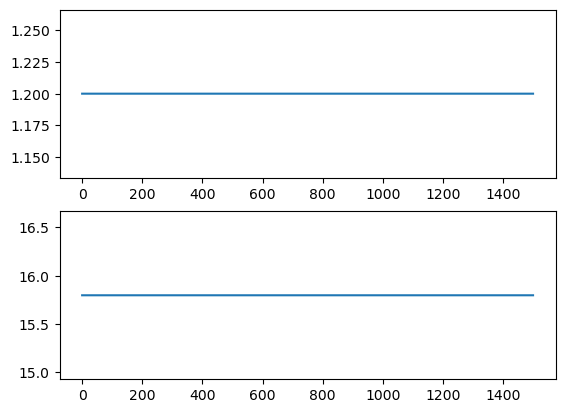

In [5]:
model = wecs_pmsm.model()
model.Dt = 0.1
model.ini({'K_pdc_1':5000,"C_dc_1":0.01,"nu_w_1":15,
           "K_p_beta_1":1,"K_i_beta_1":1.0,"T_beta_1":1},'xy_1.json')

model.run(1.0,{})
model.run(1500,{'nu_w_1':15})
model.post();

fig,axes = plt.subplots(nrows=2)
axes[0].plot(model.Time,model.get_values('omega_t_1'))
axes[1].plot(model.Time,model.get_values('beta_1'))

In [6]:
from pydae.edashboards.wecs.pmsm.wecs_pmsm_module import dashboard
db = dashboard()
#db.build()

db.ini()
db.widgets()
db.show()

Maximum number of iterations (max_it = 50) reached without convergence.
Maximum number of iterations (max_it = 50) reached without convergence.
Maximum number of iterations (max_it = 50) reached without convergence.
Maximum number of iterations (max_it = 50) reached without convergence.
Maximum number of iterations (max_it = 50) reached without convergence.
Maximum number of iterations (max_it = 50) reached without convergence.
Maximum number of iterations (max_it = 50) reached without convergence.
Maximum number of iterations (max_it = 50) reached without convergence.
Maximum number of iterations (max_it = 50) reached without convergence.


In [67]:
db = dashboard()
db.build()

VerificationError: LinkError: command 'C:\\Program Files\\Microsoft Visual Studio\\2022\\Community\\VC\\Tools\\MSVC\\14.34.31933\\bin\\HostX86\\x64\\link.exe' failed with exit code 1104

Input or parameter irrad_1 not found.
Input or parameter mode_1 not found.


TypeError: unsupported operand type(s) for /: 'FloatSlider' and 'int'

<Figure size 640x480 with 0 Axes>

In [2]:
import pv_mid
model = pv_mid.model()
db = dashboard(model)
db.show()

<Figure size 640x480 with 0 Axes>

In [12]:
model.ini({'v_dc_ref_1':1.35,"K_pdc_1":100,'irrad_1':1000,'mode_1':2},'xy_0.json')
model.ini({'v_dc_ref_1':1.35,"K_pdc_1":0.1,'irrad_1':1000,'mode_1':1, 'i_sd_i_ref_1':1.0})

model.report_u()
model.report_x()
model.report_y()
model.report_z()
#model.report_params()

P_1   = 0.00
Q_1   = 0.00
P_2   = 0.00
Q_2   = 0.00
alpha_2 = 0.00
v_ref_2 = 1.00
omega_ref_2 = 1.00
delta_ref_2 = 0.00
phi_2 = 0.00
rocov_2 = 0.00
irrad_1 =1000.00
temp_deg_1 =25.00
v_dc_ref_1 = 1.35
q_s_ref_1 = 0.00
mode_1 = 1.00
i_sd_i_ref_1 = 1.00
i_sq_i_ref_1 = 0.00
Dp_e_ref_1 = 0.00
u_dummy_1 = 0.00
delta_2 = -0.00
Domega_2 =  0.00
Dv_2  =  0.00
v_dc_1 =  1.85
xi_freq = -0.00
V_1   =  0.99
theta_1 =  0.00
V_2   =  1.00
theta_2 =  0.00
omega_2 =  1.00
i_d_2 =  0.01
i_q_2 = -0.00
p_s_2 = -0.00
q_s_2 =  0.01
i_pv_1 =  0.23
p_s_ref_1 =  0.05
i_sd_pq_ref_1 =  0.00
i_sq_pq_ref_1 =  0.05
v_td_ref_1 =  0.01
v_tq_ref_1 =  0.94
i_si_1 =  1.00
i_sr_1 =  0.05
p_s_1 =  0.05
q_s_1 = -0.99
omega_coi =  1.00
p_agc =  0.00
V_1   =  0.99
V_2   =  1.00
p_line_1_2 =  0.00
q_line_1_2 = -0.01
p_line_2_1 = -0.00
q_line_2_1 =  0.01
alpha_2 =  0.00
Dv_2  =  0.00
v_pv_1 = 41.94
p_pv_1 =  9.66
i_sd_ref_1 =  1.00
i_sq_ref_1 =  0.05
p_s_1 =  0.05
q_s_1 = -0.99
i_si_1 =  1.00
i_sr_1 =  0.05
i_tdc_1 =  0.03
m_

In [28]:
import pydae.svg_tools as st 
import ipywidgets as widgets
from IPython.display import SVG, display

model = pv_1_test.model()
model.ini({'v_dc_ref_1':1.35,"K_pdc_1":100,'irrad_1':1000},'xy_0.json')

s = st.svg(r"pv_dashboard.svg")

html = widgets.HTML(
    value= s.tostring(),
    placeholder='',
    description='',
)

tab_0 = widgets.VBox([widgets.Text(description='Sn')])
tab_1_sld_irrad = widgets.FloatSlider(description='irrad',min=0, max=1200, step=100, value=1000)
tab_1_sld_temp_deg = widgets.FloatSlider(description='temp (deg)',min=10, max=45, step=1, value=25)
tab_1 = widgets.HBox([tab_1_sld_irrad,tab_1_sld_temp_deg])

tab_2_0 = widgets.RadioButtons(
    options=['Manual', 'Power from MPPT', 'Power from speed control'],
    description='Mode:',    disabled=False)
sld_p_s = widgets.FloatSlider(description='p<sub>s</sub>*',min=0, max=1, step=0.1, value=0)
sld_v_dc = widgets.FloatSlider(description='v<sub>dc</sub>*',min=0.8, max=2.0, step=0.1, value=1.2)
sld_q_s = widgets.FloatSlider(description='q<sub>s</sub>*',min=-1, max=1, step=0.1, value=0)
sld_i_d = widgets.FloatSlider(description='i<sub>d</sub>*',min=-1, max=1, step=0.1, value=0)
sld_i_q = widgets.FloatSlider(description='i<sub>q</sub>*',min=-0.1, max=0.1, step=0.1, value=0)

tab_2_1 = widgets.VBox([sld_p_s,
                        ])
tab_2 = widgets.HBox([tab_2_0,tab_2_1])

options_mode = widgets.RadioButtons(
    options=['Normal', 'LVRT'],
    description='Mode:',    disabled=False)

tab_3_0 = widgets.HBox([options_mode,widgets.VBox([sld_v_dc,sld_q_s]),widgets.VBox([sld_i_d,sld_i_q])])
tab_3 = widgets.HBox([tab_3_0])

sld_V_g = widgets.FloatSlider(description='V<sub>g</sub>',min=0.2, max=1.2, step=0.1, value=1.0)
sld_SCR = widgets.FloatSlider(description='SCR',min=1, max=10, step=1, value=10)

tab_grid = widgets.HBox([sld_V_g,sld_SCR])

tab = widgets.Tab()
tab.children = [tab_1,tab_3,tab_grid]

#tab.set_title(0, 'PV')
tab.set_title(0, 'Enviroment')
#tab.set_title(2, 'MPPT')
tab.set_title(1, 'VSC')
tab.set_title(2, 'Grid')



# Define the slider widget and its properties
slider = widgets.IntSlider(min=0, max=100, step=1, value=0)

model.ini({'v_dc_ref_1':sld_v_dc.value,"K_pdc_1":100,'irrad_1':1000,
           'b_1_2':-0.1,'g_1_2':0.0},'xy_0.json')


# Define a function to update the text element with the slider value
def update(change):

    

    model.ini({'v_dc_ref_1':sld_v_dc.value,"K_pdc_1":100,'q_s_ref_1':sld_q_s.value,
               'irrad_1':tab_1_sld_irrad.value,'temp_deg_1':tab_1_sld_temp_deg.value,
               'i_sd_i_ref_1':sld_i_d.value, 'i_sq_i_ref_1':sld_i_q.value, 
               'b_1_2':-0.1*sld_SCR.value,
               'v_ref_2':sld_V_g.value},
               'xy_0.json')
    
    if options_mode.value == 'LVRT':
        model.ini({'v_dc_ref_1':1.8,"K_pdc_1":1,'q_s_ref_1':0.0,
                'irrad_1':tab_1_sld_irrad.value,'temp_deg_1':tab_1_sld_temp_deg.value,
                'i_sd_i_ref_1':sld_i_d.value, 'i_sq_i_ref_1':sld_i_q.value, 
                'b_1_2':-0.1*sld_SCR.value,
                'v_ref_2':sld_V_g.value})

    # s.set_tspan('p_g', f'={model.get_value("p_g_"):0.2f}')
    # s.set_tspan('q_g', f'={model.get_value("q_g_"):0.2f}')
    I_s = (model.get_value("i_si_1")**2 + model.get_value("i_sr_1")**2)**0.5
    s.set_tspan('I_s', f'={I_s:4.2f}')
    s.set_tspan('i_d_ref', f'={model.get_value("i_sd_ref_1"):5.2f}')
    s.set_tspan('i_q_ref', f'={model.get_value("i_sq_ref_1"):5.2f}')
    s.set_tspan('m', f'={model.get_value("m_ref_1"):0.2f}')
    s.set_tspan('p_s', f'={model.get_value("p_s_1"):5.2f}')
    s.set_tspan('q_s', f'={model.get_value("q_s_1"):5.2f}')
    s.set_tspan('v_dc', f'={model.get_value("v_dc_1"):0.2f}')
    s.set_tspan('i_dc', f'={model.get_value("i_pv_pu_1"):0.2f}')
    s.set_tspan('v_pv', f'={model.get_value("v_pv_1"):4.1f} V')
    s.set_tspan('i_pv', f'={model.get_value("i_pv_1"):4.1f} A')
    s.set_tspan('p_pv', f'={model.get_value("p_pv_1"):5.1f} W')
    s.set_tspan('V_pcc', f'={model.get_value("V_1"):5.2f}')
    s.set_tspan('V_g', f'={model.get_value("V_2"):5.2f}')
    # s.set_tspan('beta', f'={np.abs(model.get_value("beta_")):5.2f}')

    html.value = s.tostring() 

# Link the slider value to the text element update function
tab_1_sld_irrad.observe(update, names='value')
tab_1_sld_temp_deg.observe(update, names='value')
sld_v_dc.observe(update, names='value')
sld_q_s.observe(update, names='value')
sld_i_d.observe(update, names='value')
sld_i_q.observe(update, names='value')
sld_V_g.observe(update, names='value')
sld_SCR.observe(update, names='value')
options_mode.observe(update, names='value')

update(0)
widgets.VBox([html,tab])

In [16]:
options_mode.value

'Normal'

In [26]:
100/0.05

2000.0

In [14]:
model.ini({'v_dc_ref_1':1.35,"K_pdc_1":100,'irrad_1':1000,'mode_1':2},'xy_0.json')
model.run(1,{'mode_1':1})
model.run(200,{'mode_1':1})

model.report_u()
model.report_x()
model.report_y()
model.report_z()
#model.report_params()

P_1   = 0.00
Q_1   = 0.00
P_2   = 0.00
Q_2   = 0.00
alpha_2 = 0.00
v_ref_2 = 1.00
omega_ref_2 = 1.00
delta_ref_2 = 0.00
phi_2 = 0.00
rocov_2 = 0.00
irrad_1 =1000.00
temp_deg_1 =25.00
v_dc_ref_1 = 1.35
q_s_ref_1 = 0.00
mode_1 = 1.00
i_sd_i_ref_1 = 0.00
i_sq_i_ref_1 = 0.00
Dp_e_ref_1 = 0.00
u_dummy_1 = 0.00
delta_2 =  0.00
Domega_2 = -0.00
Dv_2  =  0.00
v_dc_1 =  1.86
xi_freq = -0.00
V_1   =  1.00
theta_1 = -0.00
V_2   =  1.00
theta_2 = -0.00
omega_2 =  1.00
i_d_2 =  0.00
i_q_2 =  0.00
p_s_2 =  0.00
q_s_2 =  0.00
i_pv_1 =  0.00
p_s_ref_1 = 51.06
i_sd_pq_ref_1 =  0.00
i_sq_pq_ref_1 = 51.06
v_td_ref_1 =  0.00
v_tq_ref_1 =  1.00
i_si_1 =  0.00
i_sr_1 = -0.00
p_s_1 = -0.00
q_s_1 = -0.00
omega_coi =  1.00
p_agc =  0.00
V_1   =  1.00
V_2   =  1.00
p_line_1_2 = -0.00
q_line_1_2 =  0.00
p_line_2_1 =  0.00
q_line_2_1 =  0.00
alpha_2 =  0.00
Dv_2  =  0.00
v_pv_1 = 42.10
p_pv_1 =  0.00
i_sd_ref_1 =  0.00
i_sq_ref_1 =  0.00
p_s_1 = -0.00
q_s_1 = -0.00
i_si_1 =  0.00
i_sr_1 = -0.00
i_tdc_1 = -0.00
m_

In [17]:
model.ini({'v_dc_ref_1':1.35,"K_pdc_1":0,'irrad_1':1000,'mode_1':1})



LinAlgError: Array must not contain infs or NaNs.